In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re

In [ ]:
data=pd.read_csv("/content/train (1).csv")
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
data.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [ ]:
data.shape

(7613, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

## Cleaning The Data

i) Make text all lower case

In [ ]:
data['text'] = data['text'].apply(lambda x: x.lower())

In [ ]:
data.iloc[85:90]

,id,keyword,location,text,target
85,126,accident,NaN,carolina accident: motorcyclist dies in i-540 ...,1
86,128,accident,"New Hanover County, NC",fyi cad:fyi: ;accident property damage;nhs;999...,1
87,129,accident,Maldives,rt naayf: first accident in years. turning ont...,1
88,130,accident,"Manchester, NH",accident left lane blocked in #manchester on r...,1
89,131,accident,"Wilmington, NC",;accident property damage; piner rd/horndale dr,1


ii) Remove punctuation

In [ ]:
data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
data.iloc[85:90]

,id,keyword,location,text,target
85,126,accident,NaN,carolina accident motorcyclist dies in i540 cr...,1
86,128,accident,"New Hanover County, NC",fyi cadfyi accident property damagenhs999 pine...,1
87,129,accident,Maldives,rt naayf first accident in years turning onto ...,1
88,130,accident,"Manchester, NH",accident left lane blocked in manchester on rt...,1
89,131,accident,"Wilmington, NC",accident property damage piner rdhorndale dr,1


iii) Remove numerical values

In [ ]:
data['text'] = data['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
data.iloc[85:90]

,id,keyword,location,text,target
85,126,accident,NaN,carolina accident motorcyclist dies in i crash...,1
86,128,accident,"New Hanover County, NC",fyi cadfyi accident property damagenhs piner r...,1
87,129,accident,Maldives,rt naayf first accident in years turning onto ...,1
88,130,accident,"Manchester, NH",accident left lane blocked in manchester on rt...,1
89,131,accident,"Wilmington, NC",accident property damage piner rdhorndale dr,1


iv) Remove common non-sensical text (/n)


In [ ]:
data['text'] = data['text'].apply(lambda x: re.sub(r'\b\w{1,2}\b', '', x))

In [ ]:
data.iloc[85:90]

,id,keyword,location,text,target
85,126,accident,NaN,carolina accident motorcyclist dies crash wi...,1
86,128,accident,"New Hanover County, NC",fyi cadfyi accident property damagenhs piner r...,1
87,129,accident,Maldives,naayf first accident years turning onto chan...,1
88,130,accident,"Manchester, NH",accident left lane blocked manchester bef...,1
89,131,accident,"Wilmington, NC",accident property damage piner rdhorndale,1


v) Tokenize text

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
from nltk.tokenize import word_tokenize

In [ ]:
data['text'] = data['text'].apply(lambda x: word_tokenize(x))

In [ ]:
data.iloc[85:90]

,id,keyword,location,text,target
85,126,accident,NaN,"[carolina, accident, motorcyclist, dies, crash...",1
86,128,accident,"New Hanover County, NC","[fyi, cadfyi, accident, property, damagenhs, p...",1
87,129,accident,Maldives,"[naayf, first, accident, years, turning, onto,...",1
88,130,accident,"Manchester, NH","[accident, left, lane, blocked, manchester, be...",1
89,131,accident,"Wilmington, NC","[accident, property, damage, piner, rdhorndale]",1


vi) Remove stop words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: [word for word in x if word not in stop_words])


In [ ]:
data.iloc[85:90]

,id,keyword,location,text,target
85,126,accident,NaN,"[carolina, accident, motorcyclist, dies, crash...",1
86,128,accident,"New Hanover County, NC","[fyi, cadfyi, accident, property, damagenhs, p...",1
87,129,accident,Maldives,"[naayf, first, accident, years, turning, onto,...",1
88,130,accident,"Manchester, NH","[accident, left, lane, blocked, manchester, ed...",1
89,131,accident,"Wilmington, NC","[accident, property, damage, piner, rdhorndale]",1


In [ ]:
data.to_pickle('data_clean.pkl')

## Organizing The Data

a) Corpus - corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = data['text'].apply(lambda x: ' '.join(x)).tolist()

In [ ]:
corpus[85:90]

['carolina accident motorcyclist dies crash car crossed median motorcycle rider traveling httptcoplzrlmy',
 'fyi cadfyi accident property damagenhs piner rdhorndale',
 'naayf first accident years turning onto chandanee magu near mma taxi rammed halfway turned everyone confû_',
 'accident left lane blocked manchester eddy stop traffic back nha delay mins traffic',
 'accident property damage piner rdhorndale']

In [ ]:
import pickle

In [ ]:
# Let's pickle it for later use
data.to_pickle("corpus.pkl")

In [ ]:
import pandas as pd

# Assume df is your DataFrame with the 'text' column stored as lists
# Convert the 'text' column from lists to strings
data['text'] = data['text'].apply(' '.join)

# Write the DataFrame to a pickle file
data.to_pickle('data.pkl')


b) Document-Term Matrix - word counts in matrix format

In [ ]:
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(corpus)
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
dtm_df.head()

,__ohhmyjoshh,__scrambledeggs,__srajapakse__,_animaladvocate,_ashj,_asianshawtyy,_bookofdaniel,_charleyisqueen,_chelsdelong,_dangdaddy,...,ûïthehighfessions,ûïwe,ûïwhen,ûïymcglaun,ûïyou,ûòthe,ûòåêcnbc,ûóher,ûókody,ûûif
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dtm_df.to_pickle("dtm.pkl")

In [ ]:
import pickle
pickle.dump(vectorizer, open("cv.pkl", "wb"))

#### Find `Most Common Words` and create word cloud.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_pickle('corpus.pkl')
data

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgive]",1
1,4,NaN,NaN,"[forest, fire, near, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1
...,...,...,...,...,...
7608,10869,NaN,NaN,"[two, giant, cranes, holding, bridge, collapse...",1
7609,10870,NaN,NaN,"[aria_ahrary, thetawniest, control, wild, fire...",1
7610,10871,NaN,NaN,"[utckm, volcano, hawaii, httptcozdtoydebj]",1
7611,10872,NaN,NaN,"[police, investigating, ebike, collided, car, ...",1


In [ ]:
all_text = ' '.join(data['text'].apply(lambda x: ' '.join(x)))

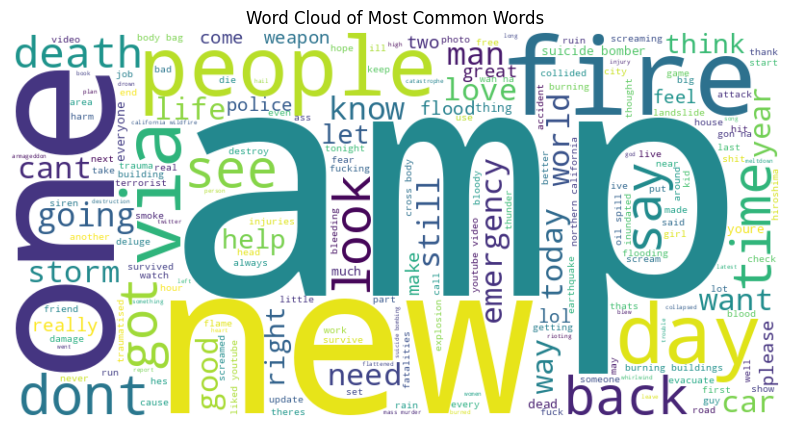

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()


#### Find  and print the top 30 words associated with top 10 keywords

In [ ]:
unique_keywords = data['keyword'].unique()
print("Unique Keywords:")
print(unique_keywords)


Unique Keywords:
[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' '

In [ ]:
num_unique_keywords = data['keyword'].nunique()
print("Number of Unique Keywords:", num_unique_keywords)


Number of Unique Keywords: 221


In [ ]:
top_10_keywords_1 = data['keyword'].value_counts().head(10).index
print(top_10_keywords_1)

for keyword in top_10_keywords_1:

    keyword_texts_1 = data[data['keyword'] == keyword]['text']


    keyword_text_1 = ' '.join(map(str, keyword_texts_1))


    word_freq_1 = pd.Series(keyword_text_1.split()).value_counts()
    top_30_words_1 = word_freq_1.head(30)

    print(f"Top 30 words for keyword '{keyword}':")
    print(top_30_words_1)


Index(['fatalities', 'deluge', 'armageddon', 'sinking', 'damage', 'harm',
       'body%20bags', 'outbreak', 'evacuate', 'fear'],
      dtype='object', name='keyword')
Top 30 words for keyword 'fatalities':
'fatalities',    37
'kombat',         8
'mortal',         5
'traffic',        3
'running',        3
['mortal',        3
'fatalities']     3
['las',           2
'youtube',        2
'need',           2
'would',          2
'tremor',         2
'video',          2
'top',            2
'vegas',          2
'last',           2
'cities',         2
'redlight',       2
['liked',         2
'japanese',       2
'accident',       2
'today',          2
'year',           2
'new',            2
'mkx',            2
'look',           2
['rcmp',          2
'near',           2
'injuries',       2
'tch',            2
Name: count, dtype: int64
Top 30 words for keyword 'deluge':
'deluge',             32
'like',                3
'deluge']              3
['photo',              2
'posts',               2
'mcmahon

 #### Look at the most common top words and add them to the stop word list.

In [ ]:
from collections import Counter

In [ ]:
top_words_per_keyword = {}
for keyword in data['keyword'].unique():
    keyword_texts = data[data['keyword'] == keyword]['text']
    keyword_text = ' '.join(map(str, keyword_texts))
    word_freq = pd.Series(keyword_text.split()).value_counts()
    top_words_per_keyword[keyword] = set(word_freq.head(30).index)

word_counter = Counter()
for keyword, words in top_words_per_keyword.items():
    word_counter.update(words)

total_keywords = len(data['keyword'].unique())
stop_words = set()
for word, count in word_counter.items():
    if count > total_keywords / 30:
        stop_words.add(word)

print("Stop Words:")
print(stop_words)


Stop Words:
{"'day',", "'near',", "'know',", "'everyone',", "'read',", "'like',", "'make',", "'year',", "'car',", "['new',", "'want',", "'may',", "'home',", "'amp',", "'via',", "'youre',", "'would',", "'never',", "'could',", "'cant',", "'gon',", "'look',", "'man',", "'need',", "'even',", "'rain',", "'heart',", "'life',", "'one',", "'still',", "'much',", "'two',", "'train',", "'full',", "'crash',", "'dont',", "'homes',", "'see',", "'city',", "'people',", "'going',", "'school',", "'good',", "'take',", "'love',", "'video',", "'new',", "'world',", "'last',", "'help',", "'time',", "'news',", "'police',", "'back',", "'night',", "'california',", "'since',", "'youtube',", "'na',", "'area',", "'fire',", "'another',", "'attack',", "'hiroshima',", "'says',", "'say',", "'save',", "'getting',", "'hit',", "'first',", "'let',", "'killed',", "'please',", "'think',", "'got',", "'dead',", "'right',", "'get',", "'thats',", "'war',", "'ass',", "'water',", "'state',"}


Cleaning the new stopwords

In [ ]:
cleaned_stop_words = {word.strip("'").strip(",") for word in stop_words}

print("Cleaned Stop Words:")
print(cleaned_stop_words)


Cleaned Stop Words:
{"life'", "ass'", "video'", "fire'", "new'", "train'", "even'", "like'", "state'", "youre'", "see'", "via'", "city'", "much'", "say'", "thats'", "make'", "back'", "since'", "gon'", "may'", "still'", "['new'", "know'", "dead'", "man'", "california'", "getting'", "let'", "school'", "last'", "home'", "water'", "day'", "night'", "could'", "dont'", "another'", "want'", "hiroshima'", "killed'", "na'", "get'", "going'", "look'", "says'", "people'", "love'", "homes'", "please'", "good'", "first'", "one'", "read'", "time'", "area'", "cant'", "police'", "would'", "crash'", "hit'", "think'", "year'", "take'", "attack'", "never'", "youtube'", "near'", "save'", "news'", "help'", "right'", "car'", "war'", "world'", "need'", "full'", "two'", "everyone'", "rain'", "amp'", "got'", "heart'"}


In [ ]:
cleaned_stop_words_1 = {word.strip("'") for word in cleaned_stop_words}

print("Cleaned Stop Words:")
print(cleaned_stop_words_1)


Cleaned Stop Words:
{'could', 'another', 'never', 'killed', 'dead', 'crash', 'rain', 'thats', 'water', 'police', 'train', 'na', 'may', 'think', 'youre', 'make', 'life', 'right', 'since', 'new', 'war', 'still', 'day', 'man', 'world', 'video', 'night', 'ass', 'know', 'one', 'first', 'going', 'amp', 'everyone', 'last', 'get', 'look', 'hiroshima', 'see', 'getting', 'dont', 'time', 'gon', 'fire', 'state', 'youtube', 'two', 'need', 'let', 'city', 'home', 'area', 'help', 'heart', 'hit', 'back', 'school', 'via', 'year', 'take', 'would', 'save', 'attack', 'read', 'even', "['new", 'much', 'cant', 'people', 'please', 'news', 'love', 'california', 'want', 'car', 'says', 'near', 'good', 'say', 'full', 'got', 'homes', 'like'}


Updating document-matrix with new stop_words

In [ ]:
stop_words_list = list(cleaned_stop_words_1)

documents = [doc for sublist in data['text'] for doc in sublist]

vectorizer = CountVectorizer(stop_words=stop_words_list)
dtm = vectorizer.fit_transform(documents)


In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
'''
import pickle
with open('dtm.pkl', 'wb') as f:
    pickle.dump(dtm, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
'''

"\nimport pickle\nwith open('dtm.pkl', 'wb') as f:\n    pickle.dump(dtm, f)\n\nwith open('vectorizer.pkl', 'wb') as f:\n    pickle.dump(vectorizer, f)\n"

#### Subplots for top 5 keywords

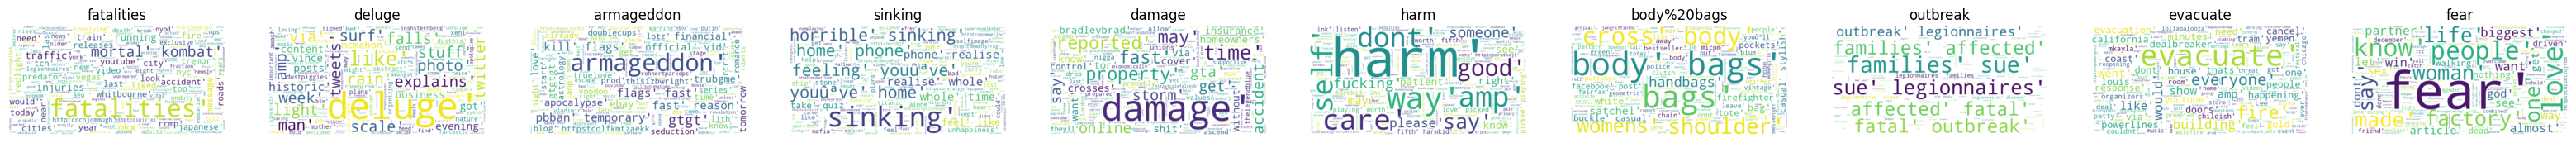

In [ ]:

top_keywords = data['keyword'].value_counts().head(10).index

fig, axes = plt.subplots(1, 10, figsize=(40, 10))

for i, keyword in enumerate(top_keywords):

    keyword_texts = data[data['keyword'] == keyword]['text']
    keyword_text = ' '.join(map(str, keyword_texts))
    keyword_text_1 = ' '.join([word.strip("'") for word in keyword_text.split()])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keyword_text_1)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(keyword)
    axes[i].axis('off')

plt.show()


#### Find the number of unique words associated with each unique keyword.

In [ ]:
import numpy as np

In [ ]:
non_zero_indices = dtm.sum(axis=0).nonzero()[1]

unique_words = vectorizer.get_feature_names_out()

unique_word_count_df = pd.DataFrame(index=data['keyword'].unique(), columns=['Unique_Word_Count'])

for i, keyword in enumerate(data['keyword'].unique()):
    keyword_indices = np.where(data['keyword'] == keyword)[0]

    unique_word_count = len(set(non_zero_indices).intersection(set(keyword_indices)))

    unique_word_count_df.loc[keyword] = unique_word_count

print("Unique Word Count for Each Keyword:")
print(unique_word_count_df)


Unique Word Count for Each Keyword:
                    Unique_Word_Count
NaN                                 0
ablaze                             36
accident                           35
aftershock                         34
airplane%20accident                35
...                               ...
wounded                            37
wounds                             33
wreck                              37
wreckage                           39
wrecked                            39

[222 rows x 1 columns]


#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit etc.

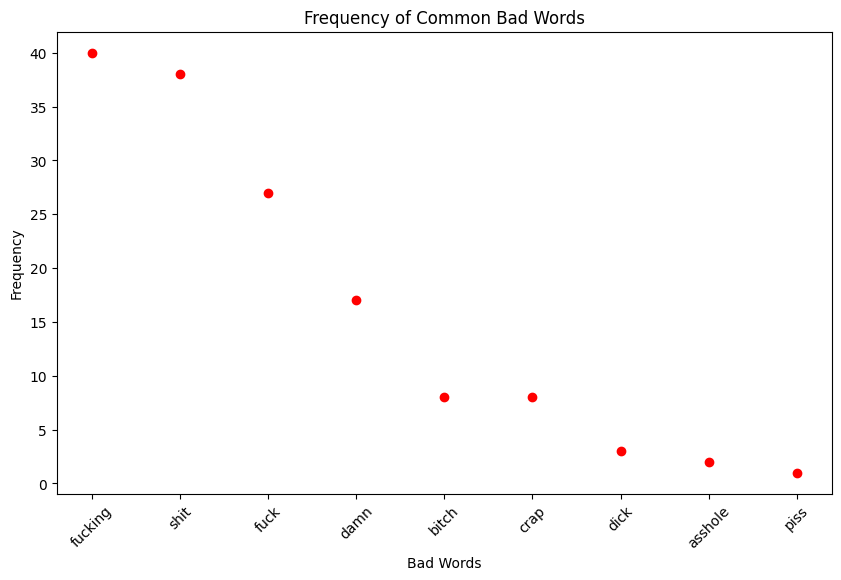

In [ ]:
text_string = ' '.join(data['text'].astype(str))

cleaned_text_string = ' '.join([word.strip("'").strip(",") for word in text_string.split()])
cleaned_text_string_1 = ' '.join([word.strip("'") for word in cleaned_text_string.split()])

word_freq = pd.Series(cleaned_text_string_1.split()).value_counts()

bad_words = ['fucking', 'fuck', 'shit', 'asshole', 'bitch', 'bastard', 'damn', 'crap', 'piss', 'dick']

bad_word_freq = word_freq[word_freq.index.isin(bad_words)]

plt.figure(figsize=(10, 6))
plt.scatter(range(len(bad_word_freq)), bad_word_freq.values, color='red')
plt.xticks(range(len(bad_word_freq)), bad_word_freq.index, rotation=45)
plt.xlabel('Bad Words')
plt.ylabel('Frequency')
plt.title('Frequency of Common Bad Words')
plt.show()


#### Assignment 4:(optional)

 What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

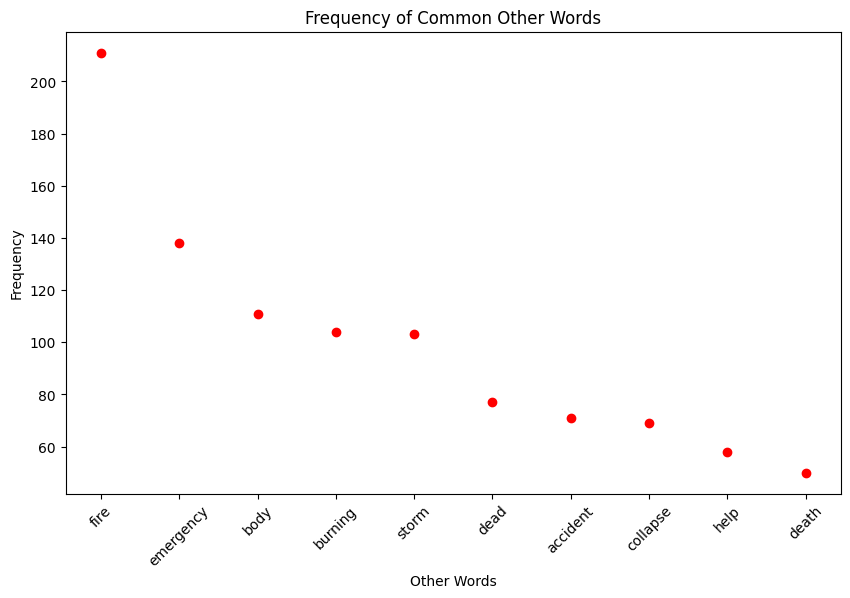

In [ ]:
other_words = ['emergency', 'death', 'dead', 'fire', 'collapse', 'body', 'accident', 'storm', 'burning', 'help']

bad_word_freq = word_freq[word_freq.index.isin(other_words)]

plt.figure(figsize=(10, 6))
plt.scatter(range(len(bad_word_freq)), bad_word_freq.values, color='red')
plt.xticks(range(len(bad_word_freq)), bad_word_freq.index, rotation=45)
plt.xlabel('Other Words')
plt.ylabel('Frequency')
plt.title('Frequency of Common Other Words')
plt.show()


#Sentiment Analysis

In [ ]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgive]",1
1,4,NaN,NaN,"[forest, fire, near, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1
...,...,...,...,...,...
7608,10869,NaN,NaN,"[two, giant, cranes, holding, bridge, collapse...",1
7609,10870,NaN,NaN,"[aria_ahrary, thetawniest, control, wild, fire...",1
7610,10871,NaN,NaN,"[utckm, volcano, hawaii, httptcozdtoydebj]",1
7611,10872,NaN,NaN,"[police, investigating, ebike, collided, car, ...",1


In [ ]:
print(len(data['text']))
print(len(data))

7613
7613


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Find the polarity and subjectivity of each routine

In [ ]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


In [ ]:

data['polarity'] = data['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
data['subjectivity'] = data['text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)


In [ ]:
data

,id,keyword,location,text,target,polarity,subjectivity
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgive]",1,0.000000,0.000000
1,4,NaN,NaN,"[forest, fire, near, ronge, sask, canada]",1,0.100000,0.400000
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1,-0.100000,0.400000
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1,0.000000,0.000000
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1,0.000000,0.000000
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,"[two, giant, cranes, holding, bridge, collapse...",1,0.000000,1.000000
7609,10870,NaN,NaN,"[aria_ahrary, thetawniest, control, wild, fire...",1,0.100000,0.400000
7610,10871,NaN,NaN,"[utckm, volcano, hawaii, httptcozdtoydebj]",1,0.000000,0.000000
7611,10872,NaN,NaN,"[police, investigating, ebike, collided, car, ...",1,-0.260417,0.583333


Plot the results

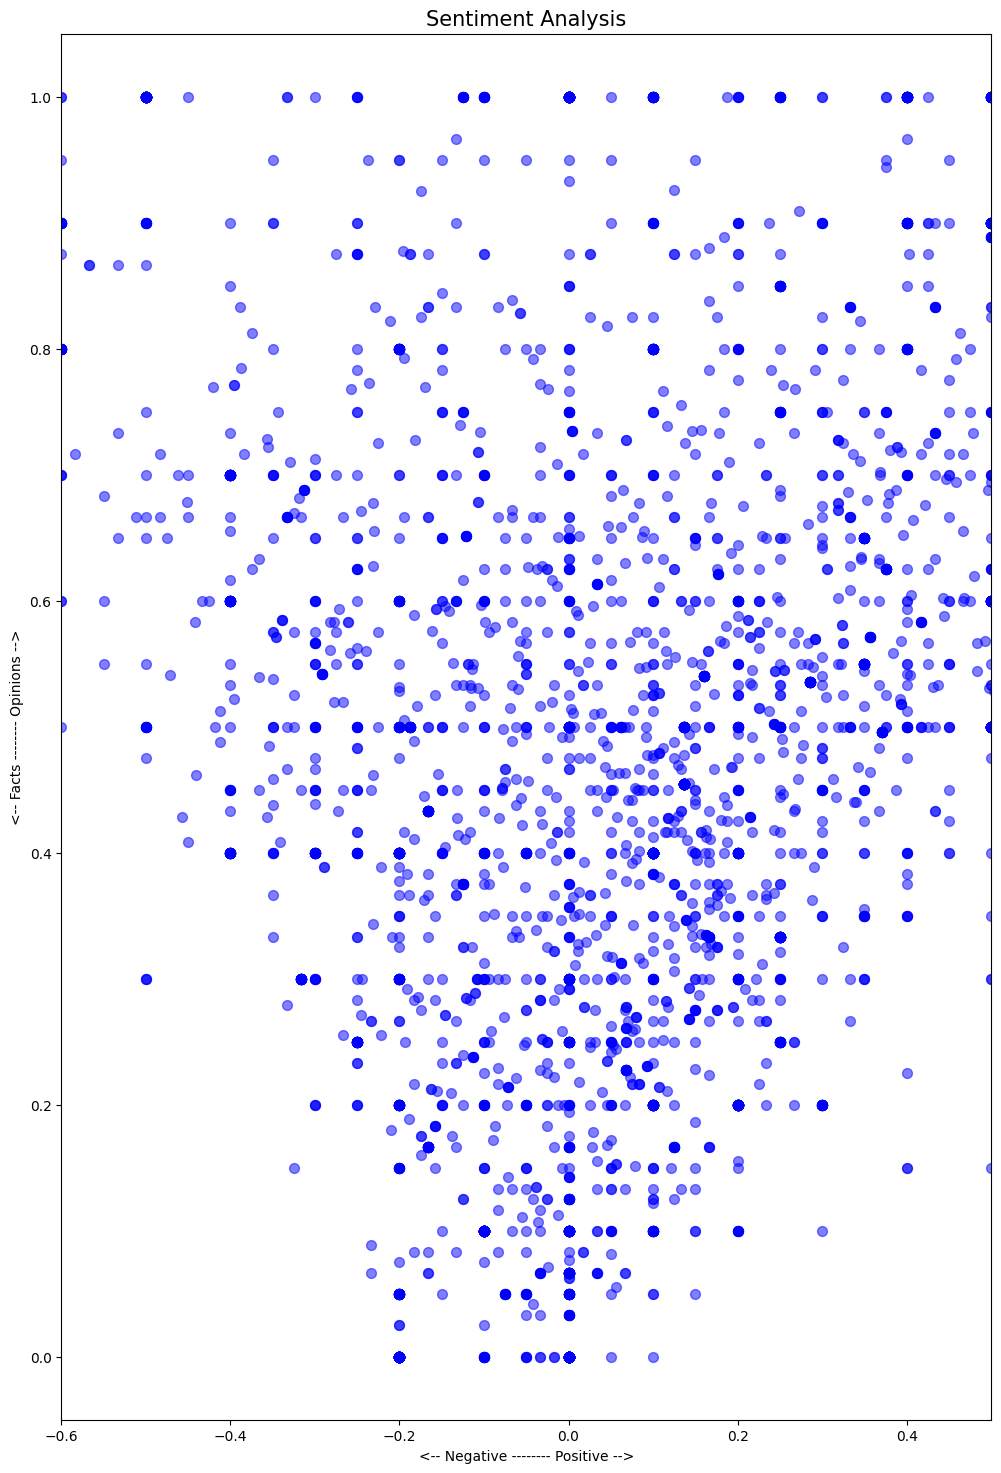

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 18]

marker_size = 50
alpha = 0.5

for index, tweet in enumerate(data.index):

    x = data.polarity.loc[tweet]
    y = data.subjectivity.loc[tweet]

    plt.scatter(x, y, color='blue',s=marker_size, alpha=alpha)

    plt.xlim(-0.6, 0.5)

plt.title('Sentiment Analysis', fontsize=15)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=10)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=10)

plt.show()


In [ ]:
filtered_data = data.head(300)
filtered_data

,id,keyword,location,text,target,polarity,subjectivity
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgive]",1,0.000000,0.000000
1,4,NaN,NaN,"[forest, fire, near, ronge, sask, canada]",1,0.100000,0.400000
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1,-0.100000,0.400000
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1,0.000000,0.000000
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1,0.000000,0.000000
...,...,...,...,...,...,...,...
295,435,apocalypse,NaN,"[minecraft, night, lucky, block, mod, bob, apo...",0,0.244444,0.544444
296,436,apocalypse,NaN,"[shot, heart, going, totally, give, love, bad,...",0,-0.066667,0.672222
297,437,apocalypse,NaN,"[geek_apocalypse, gmt, hesse, plays, dark, sou...",0,-0.150000,0.400000
298,438,apocalypse,Las Vegas,"[know, zombies, take, httptcohuthxlkyxy]",0,0.000000,0.000000


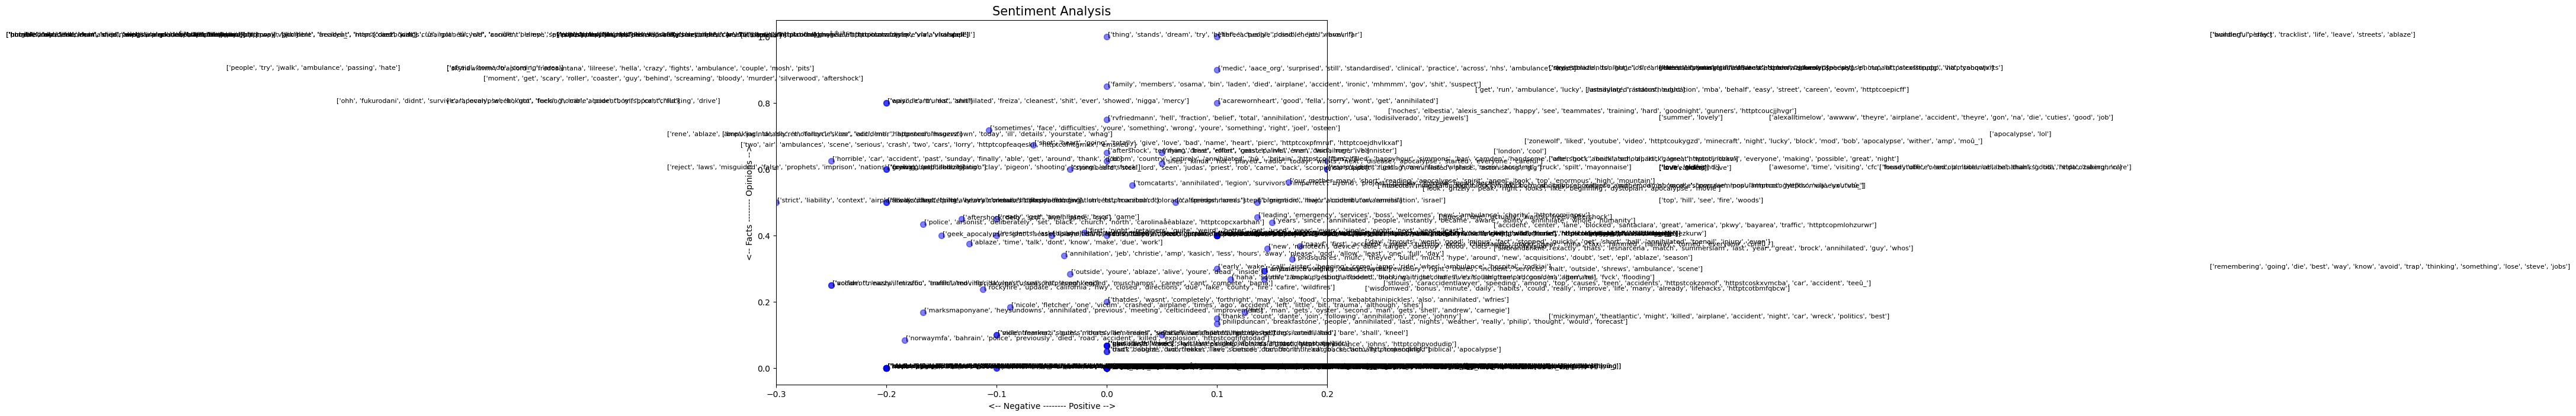

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]

marker_size = 50
alpha = 0.5

for index, tweet in enumerate(filtered_data.index):

    x = filtered_data.polarity.loc[tweet]
    y = filtered_data.subjectivity.loc[tweet]

    plt.scatter(x, y, color='blue',s=marker_size, alpha=alpha)

    plt.text(x + 0.001, y + 0.001, filtered_data['text'][index], fontsize=8)

    plt.xlim(-0.3, 0.2)

plt.title('Sentiment Analysis', fontsize=15)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=10)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=10)

plt.show()


Split each routine into 10 parts

In [ ]:
import numpy as np
import math

In [ ]:
data

,id,keyword,location,text,target,polarity,subjectivity
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgive]",1,0.000000,0.000000
1,4,NaN,NaN,"[forest, fire, near, ronge, sask, canada]",1,0.100000,0.400000
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1,-0.100000,0.400000
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1,0.000000,0.000000
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1,0.000000,0.000000
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,"[two, giant, cranes, holding, bridge, collapse...",1,0.000000,1.000000
7609,10870,NaN,NaN,"[aria_ahrary, thetawniest, control, wild, fire...",1,0.100000,0.400000
7610,10871,NaN,NaN,"[utckm, volcano, hawaii, httptcozdtoydebj]",1,0.000000,0.000000
7611,10872,NaN,NaN,"[police, investigating, ebike, collided, car, ...",1,-0.260417,0.583333


In [ ]:
def split_text(text, n=10):

    length = len(text)

    if length <= 0:
        return [text]

    if length <= n:
        return [text]

    size = math.ceil(length / n)
    start = np.arange(0, length, size)

    split_list = []
    for piece in range(n):
        if start[piece] + size < length:
            split_list.append(text[start[piece]:start[piece] + size])
        else:
            split_list.append(text[start[piece]:])
            break
    return split_list


In [ ]:
list_pieces = []

for text in data['text']:
    split = split_text(text)
    if isinstance(split[0], list):
        for part in split:
            list_pieces.append(part)
    else:
        list_pieces.append(split)

list_pieces


[['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive'],
 ['forest', 'fire', 'near', 'ronge', 'sask', 'canada'],
 ['residents', 'asked'],
 ['shelter', 'place'],
 ['notified', 'officers'],
 ['evacuation', 'shelter'],
 ['place', 'orders'],
 ['expected'],
 ['people', 'receive', 'wildfires', 'evacuation', 'orders', 'california'],
 ['got',
  'sent',
  'photo',
  'ruby',
  'alaska',
  'smoke',
  'wildfires',
  'pours',
  'school'],
 ['rockyfire', 'update'],
 ['california', 'hwy'],
 ['closed', 'directions'],
 ['due', 'lake'],
 ['county', 'fire'],
 ['cafire', 'wildfires'],
 ['flood', 'disaster'],
 ['heavy', 'rain'],
 ['causes', 'flash'],
 ['flooding', 'streets'],
 ['manitou', 'colorado'],
 ['springs', 'areas'],
 ['top', 'hill', 'see', 'fire', 'woods'],
 ['theres',
  'emergency',
  'evacuation',
  'happening',
  'building',
  'across',
  'street'],
 ['afraid', 'tornado', 'coming', 'area'],
 ['three', 'people', 'died', 'heat', 'wave', 'far'],
 ['haha', 'south'],
 ['tampa', 'getting'],
 ['f

In [ ]:
len(list_pieces)

25217

In [ ]:
len(list_pieces[0])

6

In [ ]:
polarity_text = []

for lp in list_pieces:
    polarity_piece = []

    for p in lp:
        if isinstance(p, str):
            polarity_piece.append(TextBlob(p).sentiment.polarity)

    polarity_text.append(polarity_piece)

polarity_text


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.1, 0.0, 0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [-0.1],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [-0.1, 0.0],
 [-0.125, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [-0.2, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.5, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [-0.6, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.1],
 [0.2, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.13636363636363635, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0],
 [0.5, 0.0],
 [0.0, 0.5],
 [0.0, 0.2],
 [0.0],
 [-0.3333333333333333],
 [0.0, 0.35],
 [0.5, 0.0],
 [1.0, 0.0],
 [0.0],
 [0.0, 0.0, 0.0, -0.2],
 [0.0, 0.0, 0.0],
 [0.5, 0.0],
 [0.0],
 [0.0, 0.0],
 [0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.

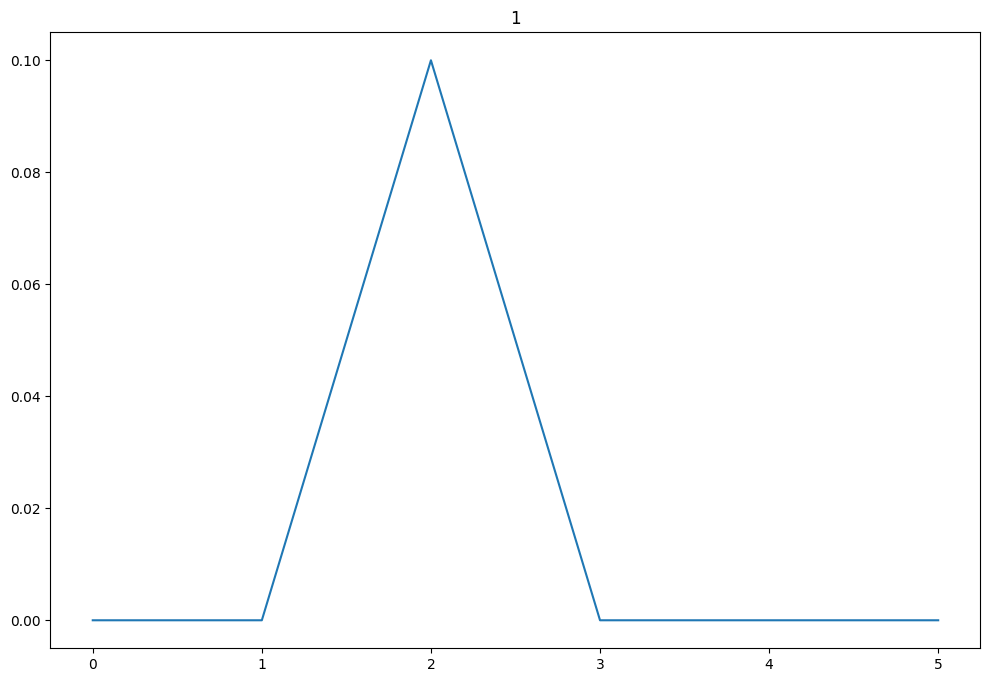

In [ ]:
keyword_index = 1

plt.plot(polarity_text[keyword_index])

plt.title(data.index[keyword_index])

plt.show()


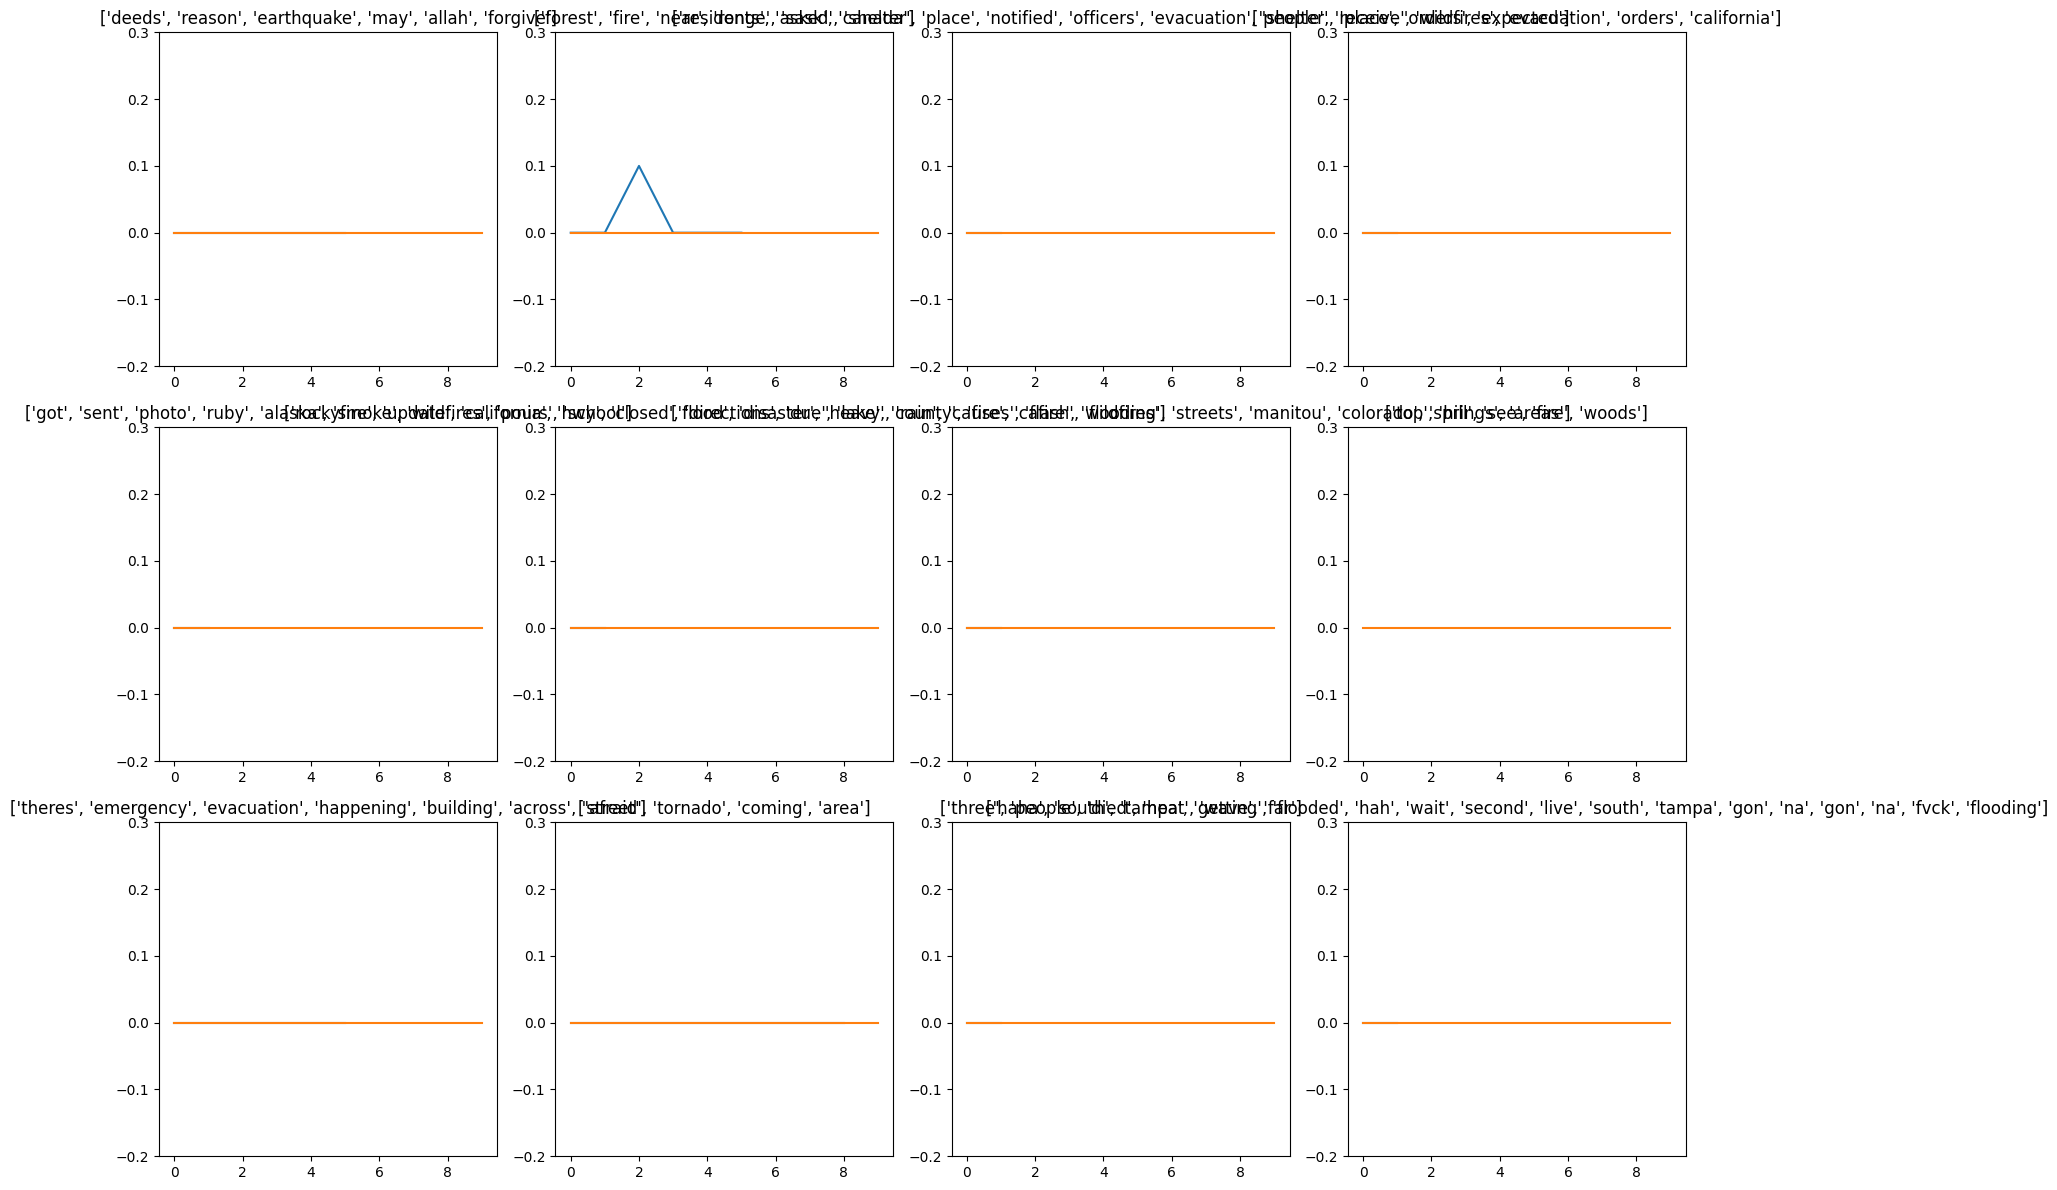

In [ ]:
import numpy as np

num_plots = min(len(data.index), 12)

num_rows = 3
num_cols = 4

plt.rcParams['figure.figsize'] = [16, 12]

for index, keyword in enumerate(data.index[:num_plots]):

    plt.subplot(num_rows, num_cols, index + 1)

    plt.plot(polarity_text[index])

    plt.plot(np.arange(0, 10), np.zeros(10))

    plt.title(data['text'][index])

    plt.ylim(ymin=-0.2, ymax=0.3)

plt.tight_layout()
plt.show()


# Topic Modeling

In [ ]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data


,__ohhmyjoshh,__scrambledeggs,__srajapakse__,_animaladvocate,_ashj,_asianshawtyy,_bookofdaniel,_charleyisqueen,_chelsdelong,_dangdaddy,...,ûïthehighfessions,ûïwe,ûïwhen,ûïymcglaun,ûïyou,ûòthe,ûòåêcnbc,ûóher,ûókody,ûûif
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(7613, 21382)

In [ ]:
from gensim import matutils, models
import scipy.sparse
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
tdm = data.transpose()
tdm.head()


,0,1,2,3,4,5,6,7,8,9,...,7603,7604,7605,7606,7607,7608,7609,7610,7611,7612
__ohhmyjoshh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
__scrambledeggs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
__srajapakse__,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_animaladvocate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_ashj,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [ ]:
cv = pickle.load(open("cv.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())


In [ ]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.004*"suicide" + 0.004*"people" + 0.004*"like" + 0.003*"police" + 0.003*"amp" + 0.003*"new" + 0.003*"bomb" + 0.002*"bomber" + 0.002*"families" + 0.002*"fire"'),
 (1,
  '0.004*"like" + 0.004*"video" + 0.004*"get" + 0.003*"storm" + 0.003*"amp" + 0.003*"dont" + 0.003*"news" + 0.002*"emergency" + 0.002*"got" + 0.002*"via"')]

In [ ]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.007*"get" + 0.006*"like" + 0.006*"suicide" + 0.003*"bomber" + 0.003*"new" + 0.003*"dont" + 0.003*"amp" + 0.003*"fires" + 0.003*"storm" + 0.002*"time"'),
 (1,
  '0.005*"disaster" + 0.005*"like" + 0.004*"video" + 0.004*"nuclear" + 0.003*"still" + 0.003*"one" + 0.003*"california" + 0.003*"dont" + 0.003*"amp" + 0.003*"war"'),
 (2,
  '0.006*"fire" + 0.004*"crash" + 0.004*"amp" + 0.004*"families" + 0.004*"news" + 0.003*"police" + 0.003*"via" + 0.003*"mass" + 0.003*"people" + 0.002*"killed"')]

In [ ]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.006*"disaster" + 0.005*"fire" + 0.004*"train" + 0.004*"old" + 0.004*"obama" + 0.004*"bomb" + 0.003*"amp" + 0.003*"trapped" + 0.003*"released" + 0.003*"failure"'),
 (1,
  '0.005*"storm" + 0.004*"new" + 0.004*"still" + 0.004*"amp" + 0.004*"get" + 0.003*"wreck" + 0.003*"like" + 0.003*"weapon" + 0.003*"nuclear" + 0.003*"via"'),
 (2,
  '0.008*"like" + 0.006*"dont" + 0.005*"fires" + 0.004*"get" + 0.004*"california" + 0.004*"fire" + 0.003*"wildfire" + 0.003*"na" + 0.003*"sinking" + 0.003*"going"'),
 (3,
  '0.008*"suicide" + 0.005*"video" + 0.004*"police" + 0.004*"news" + 0.004*"youtube" + 0.003*"crash" + 0.003*"dead" + 0.003*"killed" + 0.003*"weapons" + 0.003*"bombing"')]

In [ ]:
from nltk import word_tokenize, pos_tag

def nouns(text):

      is_noun = lambda pos: pos[:2] == 'NN'
      tokenized = word_tokenize(text)
      all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
      return ' '.join(all_nouns)


In [ ]:
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgive]",1
1,4,NaN,NaN,"[forest, fire, near, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1
...,...,...,...,...,...
7608,10869,NaN,NaN,"[two, giant, cranes, holding, bridge, collapse...",1
7609,10870,NaN,NaN,"[aria_ahrary, thetawniest, control, wild, fire...",1
7610,10871,NaN,NaN,"[utckm, volcano, hawaii, httptcozdtoydebj]",1
7611,10872,NaN,NaN,"[police, investigating, ebike, collided, car, ...",1


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
data_clean['text_str'] = data_clean['text'].apply(lambda x: ' '.join(x))

data_nouns = pd.DataFrame(data_clean['text_str'].apply(nouns))

data_clean.drop(columns=['text_str'], inplace=True)

data_nouns.head()


,text_str
0,deeds reason earthquake
1,fire ronge sask canada
2,residents place officers place orders
3,people wildfires orders
4,photo ruby alaska smoke school


In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

add_stop_words = ['rain', 'could', 'help', 'let', 'news', 'everyone', 'even', 'people', 'war', 'police', 'youre', 'cant', 'make', 'video', 'would', "['new", 'like', 'homes', 'california', 'take', 'water', 'says', 'last', 'see', 'gon', 'man', 'na', 'state', 'say', 'back', 'train', 'crash', 'night', 'look', 'want', 'one', 'home', 'car', 'near', 'amp', 'day', 'much', 'please', 'world', 'two', 'need', 'getting', 'hiroshima', 'school', 'killed', 'know', 'life', 'fire', 'heart', 'first', 'never', 'get', 'going', 'love', 'right', 'got', 'area', 'full', 'good', 'youtube', 'via', 'attack', 'time', 'thats', 'still', 'city', 'dead', 'save', 'hit', 'dont', 'new', 'year', 'read', 'think', 'ass', 'since', 'another', 'may']
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.text_str)

feature_names = cvn.get_feature_names_out()

data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=feature_names)
data_dtmn.index = data_nouns.index
data_dtmn


,__scrambledeggs,_ashj,_asianshawtyy,_bookofdaniel,_dangerousbeans,_edvinnn,_freemarketeer,_gaabyx,_itsdanie_,_itsmegss_,...,ûïparties,ûïrichmond,ûïsippinûª,ûïthatûªs,ûïthe,ûïthehighfessions,ûïwhen,ûïyou,ûòåêcnbc,ûûif
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [ ]:
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.007*"disaster" + 0.005*"bomb" + 0.004*"fires" + 0.004*"suicide" + 0.004*"bomber" + 0.004*"families" + 0.004*"wreck" + 0.003*"today" + 0.003*"years" + 0.003*"watch"'),
 (1,
  '0.005*"storm" + 0.004*"emergency" + 0.003*"wildfire" + 0.003*"way" + 0.003*"thunderstorm" + 0.003*"body" + 0.003*"weapons" + 0.003*"wreckage" + 0.003*"thunder" + 0.003*"failure"')]

In [ ]:
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.008*"storm" + 0.005*"wreck" + 0.004*"failure" + 0.004*"thunder" + 0.004*"investigators" + 0.004*"emergency" + 0.004*"oil" + 0.003*"trauma" + 0.003*"disaster" + 0.003*"twister"'),
 (1,
  '0.005*"wildfire" + 0.005*"fires" + 0.004*"death" + 0.004*"watch" + 0.003*"survivors" + 0.003*"terrorism" + 0.003*"today" + 0.003*"lol" + 0.003*"smoke" + 0.003*"officer"'),
 (2,
  '0.006*"disaster" + 0.006*"bomber" + 0.006*"suicide" + 0.006*"families" + 0.006*"bomb" + 0.004*"obama" + 0.004*"army" + 0.004*"mass" + 0.004*"movie" + 0.004*"emergency"')]

In [ ]:
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.008*"families" + 0.007*"wildfire" + 0.005*"failure" + 0.005*"buildings" + 0.005*"investigators" + 0.005*"survivors" + 0.005*"terrorism" + 0.004*"trauma" + 0.004*"smoke" + 0.004*"officer"'),
 (1,
  '0.010*"disaster" + 0.006*"wreckage" + 0.005*"obama" + 0.005*"fires" + 0.004*"weapon" + 0.004*"emergency" + 0.004*"weather" + 0.004*"security" + 0.004*"typhoon" + 0.003*"migrants"'),
 (2,
  '0.008*"storm" + 0.007*"wreck" + 0.006*"years" + 0.006*"weapons" + 0.005*"mass" + 0.005*"emergency" + 0.005*"trouble" + 0.004*"body" + 0.004*"way" + 0.004*"content"'),
 (3,
  '0.008*"suicide" + 0.008*"bomber" + 0.006*"thunderstorm" + 0.005*"bomb" + 0.005*"thunder" + 0.005*"army" + 0.005*"movie" + 0.004*"watch" + 0.004*"earthquake" + 0.004*"lol"')]

#### Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [ ]:
def nouns_adj(text):

       is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
       tokenized = word_tokenize(text)
       nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
       return ' '.join(nouns_adj)

In [ ]:
data_clean['text_str'] = data_clean['text'].apply(lambda x: ' '.join(x))

data_nouns_adj = pd.DataFrame(data_clean['text_str'].apply(nouns_adj))

data_clean.drop(columns=['text_str'], inplace=True)

data_nouns_adj.head()


,text_str
0,deeds reason earthquake forgive
1,forest fire ronge sask canada
2,residents shelter place officers shelter place...
3,people wildfires evacuation orders
4,sent photo ruby alaska smoke school


In [ ]:
cvna = CountVectorizer(stop_words=stop_words,max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.text_str)

feature_namesa = cvna.get_feature_names_out()

data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=feature_namesa)
data_dtmna.index = data_nouns_adj.index
data_dtmna


,__ohhmyjoshh,__scrambledeggs,__srajapakse__,_animaladvocate,_ashj,_asianshawtyy,_bookofdaniel,_charleyisqueen,_dangdaddy,_dangerousbeans,...,ûïsippinûª,ûïthatûªs,ûïthe,ûïthehighfessions,ûïwhen,ûïymcglaun,ûïyou,ûòåêcnbc,ûókody,ûûif
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.005*"suicide" + 0.004*"storm" + 0.003*"bomber" + 0.003*"bomb" + 0.003*"wildfire" + 0.003*"old" + 0.002*"body" + 0.002*"twister" + 0.002*"fires" + 0.002*"buildings"'),
 (1,
  '0.005*"disaster" + 0.004*"emergency" + 0.003*"nuclear" + 0.003*"families" + 0.003*"wreck" + 0.002*"thunderstorm" + 0.002*"years" + 0.002*"weapons" + 0.002*"wreckage" + 0.002*"obama"')]

In [ ]:
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.004*"wreck" + 0.004*"wildfire" + 0.003*"thunderstorm" + 0.003*"severe" + 0.003*"failure" + 0.003*"structural" + 0.003*"investigators" + 0.003*"fatal" + 0.003*"survivors" + 0.003*"tragedy"'),
 (1,
  '0.008*"suicide" + 0.005*"bomber" + 0.005*"fires" + 0.004*"old" + 0.004*"wreckage" + 0.004*"bomb" + 0.003*"malaysia" + 0.003*"army" + 0.003*"wild" + 0.003*"forest"'),
 (2,
  '0.006*"storm" + 0.006*"disaster" + 0.005*"nuclear" + 0.005*"families" + 0.003*"northern" + 0.003*"obama" + 0.003*"emergency" + 0.003*"movie" + 0.003*"death" + 0.003*"weapons"')]

In [ ]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.005*"suicide" + 0.005*"emergency" + 0.005*"thunderstorm" + 0.004*"mass" + 0.004*"failure" + 0.004*"structural" + 0.004*"survivors" + 0.003*"mosque" + 0.003*"earthquake" + 0.003*"years"'),
 (1,
  '0.008*"storm" + 0.005*"wreck" + 0.005*"suicide" + 0.004*"bomb" + 0.004*"northern" + 0.004*"violent" + 0.003*"terrorist" + 0.003*"bomber" + 0.003*"pkk" + 0.003*"trauma"'),
 (2,
  '0.010*"disaster" + 0.007*"nuclear" + 0.004*"weapons" + 0.004*"obama" + 0.004*"terrorism" + 0.003*"content" + 0.003*"hot" + 0.003*"wreckage" + 0.003*"natural" + 0.003*"reddit"'),
 (3,
  '0.007*"fires" + 0.007*"families" + 0.005*"wildfire" + 0.005*"old" + 0.004*"thunder" + 0.004*"wild" + 0.004*"black" + 0.004*"investigators" + 0.004*"forest" + 0.004*"fatal"')]

In [ ]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.010*"disaster" + 0.007*"nuclear" + 0.004*"northern" + 0.004*"obama" + 0.004*"body" + 0.004*"weapons" + 0.003*"failure" + 0.003*"structural" + 0.003*"survivors" + 0.003*"terrorism"'),
 (1,
  '0.007*"storm" + 0.004*"wildfire" + 0.004*"mass" + 0.004*"watch" + 0.004*"today" + 0.004*"fatal" + 0.003*"oil" + 0.003*"black" + 0.003*"emergency" + 0.003*"smoke"'),
 (2,
  '0.008*"suicide" + 0.005*"bomb" + 0.005*"bomber" + 0.004*"old" + 0.004*"years" + 0.003*"atomic" + 0.003*"mosque" + 0.003*"loud" + 0.003*"collapse" + 0.003*"fear"'),
 (3,
  '0.006*"families" + 0.005*"fires" + 0.004*"wreck" + 0.004*"forest" + 0.004*"malaysia" + 0.004*"wreckage" + 0.004*"wild" + 0.003*"movie" + 0.003*"earthquake" + 0.003*"emergency"')]

In [ ]:
corpus_transformed = ldana[corpusna]
list(zip([a[0] for a in corpus_transformed], data_dtmna.index))


[((0, 0.25067833), 0),
 ((0, 0.6458683), 1),
 ((0, 0.031384695), 2),
 ((0, 0.06251579), 3),
 ((0, 0.701392), 4),
 ((0, 0.03130362), 5),
 ((0, 0.15178862), 6),
 ((0, 0.08350996), 7),
 ((0, 0.042212483), 8),
 ((0, 0.7481811), 9),
 ((0, 0.7474205), 10),
 ((0, 0.025403416), 11),
 ((0, 0.041794755), 12),
 ((0, 0.06260151), 13),
 ((0, 0.84423125), 14),
 ((0, 0.12501852), 15),
 ((0, 0.1251938), 16),
 ((0, 0.6221549), 17),
 ((0, 0.12505648), 18),
 ((0, 0.12559721), 19),
 ((0, 0.1251548), 20),
 ((0, 0.08336063), 21),
 ((0, 0.12564185), 22),
 ((0, 0.62475705), 23),
 ((0, 0.12564172), 24),
 ((0, 0.062633514), 25),
 ((0, 0.12841937), 26),
 ((0, 0.12510113), 27),
 ((0, 0.6231227), 28),
 ((0, 0.12564264), 29),
 ((0, 0.12502396), 30),
 ((0, 0.050135568), 31),
 ((0, 0.06261598), 32),
 ((0, 0.7048843), 33),
 ((0, 0.08339301), 34),
 ((0, 0.06266906), 35),
 ((0, 0.031707246), 36),
 ((0, 0.8489254), 37),
 ((0, 0.025580134), 38),
 ((0, 0.41672683), 39),
 ((0, 0.8914475), 40),
 ((0, 0.06252611), 41),
 ((0, 

# Text Generation

In [ ]:
data = pd.read_pickle('data.pkl')
data

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive,1
1,4,NaN,NaN,forest fire near ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearb...,1
7609,10870,NaN,NaN,aria_ahrary thetawniest control wild fires cal...,1
7610,10871,NaN,NaN,utckm volcano hawaii httptcozdtoydebj,1
7611,10872,NaN,NaN,police investigating ebike collided car little...,1


In [ ]:
filtered_data = data[:1000]

filtered_text = filtered_data['text'].astype(str)

filtered_text.head()


0            deeds reason earthquake may allah forgive
1                   forest fire near ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [ ]:
from collections import defaultdict
import random
import re

In [ ]:
import re

def markov_chain(text):
    words = re.findall(r'\b\w+\b', text.lower())
    m_dict = defaultdict(list)
    for current_word, next_word in zip(words, words[1:]):
        m_dict[current_word].append(next_word)
    return m_dict

In [ ]:
filtered_dict = filtered_text.apply(lambda x: markov_chain(x))
filtered_dict

0      {'deeds': ['reason'], 'reason': ['earthquake']...
1      {'forest': ['fire'], 'fire': ['near'], 'near':...
2      {'residents': ['asked'], 'asked': ['shelter'],...
3      {'people': ['receive'], 'receive': ['wildfires...
4      {'got': ['sent'], 'sent': ['photo'], 'photo': ...
                             ...                        
995    {'body': ['bagging'], 'bagging': ['bitches'], ...
996    {'better': ['feeling'], 'feeling': ['seeing'],...
997    {'mopheme': ['bigstar'], 'bigstar': ['johnson'...
998    {'body': ['bagging'], 'bagging': ['todaygot'],...
999    {'editaxohaze': ['let'], 'let': ['bagging'], '...
Name: text, Length: 1000, dtype: object

In [ ]:
def generate_sentence(markov_dict, max_length=10):

    current_word = random.choice(list(markov_dict.keys()))
    print(f"Current word: {current_word}")
    sentence = [current_word]

    for _ in range(max_length):

        if current_word in markov_dict:
            next_word = random.choice(markov_dict[current_word])
        else:
            break
        print(f"Next word: {next_word}")
        sentence.append(next_word)
        current_word = next_word

    return ' '.join(sentence)

sentences = [generate_sentence(markov_dict) for markov_dict in filtered_dict]

Current word: earthquake
Next word: may
Next word: allah
Next word: forgive
Current word: near
Next word: ronge
Next word: sask
Next word: canada
Current word: officers
Next word: evacuation
Next word: shelter
Next word: place
Next word: notified
Next word: officers
Next word: evacuation
Next word: shelter
Next word: place
Next word: notified
Next word: officers
Current word: orders
Next word: california
Current word: ruby
Next word: alaska
Next word: smoke
Next word: wildfires
Next word: pours
Next word: school
Current word: directions
Next word: due
Next word: lake
Next word: county
Next word: fire
Next word: cafire
Next word: wildfires
Current word: flooding
Next word: streets
Next word: manitou
Next word: colorado
Next word: springs
Next word: areas
Current word: hill
Next word: see
Next word: fire
Next word: woods
Current word: happening
Next word: building
Next word: across
Next word: street
Current word: afraid
Next word: tornado
Next word: coming
Next word: area
Current word: w

IndexError: list index out of range

In [ ]:
# Print the generated sentences
for i, sentence in enumerate(sentences, 1):
  print(f"Sentence {i}: {sentence}")

Sentence 1: manutd emilymcfcheslop wow wow club blown money fucked player like theyd pilloried
Sentence 2: amazon deal wait buy httptcotvqkeari
Sentence 3: musician kalle mattson recreates classic album covers clever music video avalanche httptcoydjpophdw
Sentence 4: aftershock fullã streaming youtube httptcovveusesgf
Sentence 5: guy whistled parking lot amp help wind blew skirt getting car
